# The  𝑘-Nearest Neighbors Algorithm

## 1. Introduction

### $k$-Nearest Neighbors
The $k$-nearest neighbors algorithm, or **KNN** for short, is a nonparametric algorithm that assumes that similar data exist in close proximity. In other words, similar things are near to each other. 

To illustrate this point, let us import the following packages, load the iris dataset, and plot the sepal length versus sepal width. 

---

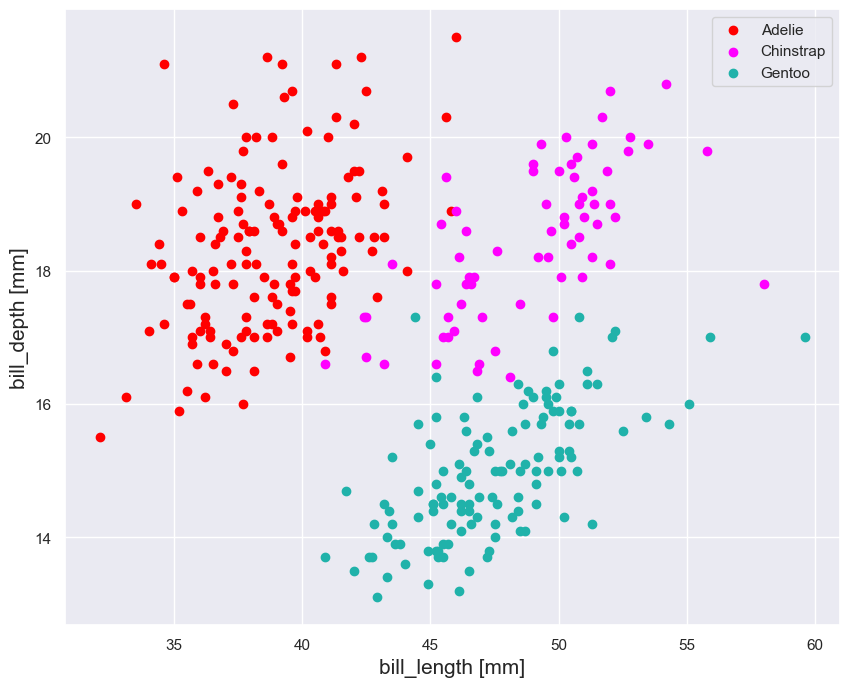

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme for plotting
sns.set_theme()

# Import the data
df = pd.read_csv("Datasets/palmer_penguins.csv")

# Plot the data
penguins = ["Adelie", "Chinstrap", "Gentoo"]
colors = ["red", "magenta", "lightseagreen"]

fig, ax = plt.subplots(figsize = (10, 8))
for species, color in zip(penguins, colors):
    temp_df = df[df.species == species]
    ax.scatter(temp_df.bill_length_mm,
               temp_df.bill_depth_mm,
               c = color,
               label = species, 
               )

    
ax.set_xlabel("bill_length [mm]", fontsize = 15)
ax.set_ylabel("bill_depth [mm]", fontsize = 15)
ax.legend()
plt.show()

---

Notice in the image above that most of the time, similar data points are close to each other. The KNN algorithm hinges on this assumption being true enough for the algorithm to be useful. KNN captures the idea of similarity (sometimes called distance, proximity, or closeness) with some mathematics we might have learned in our childhood— calculating the distance between points on a graph.

### The KNN Algorithm
1. Load the data
2. Initialize K to your chosen number of neighbors
3. For each example in the data
 - 3.1 Calculate the distance between the query example and the current example from the data.
 - 3.2 Add the distance and the index of the example to an ordered collection
4. Sort the ordered collection of distances and indices from smallest to largest (in ascending order) by the distances
5. Pick the first K entries from the sorted collection
6. Get the labels of the selected K entries
7. If regression, return the mean of the K labels
8. If classification, return the mode of the K labels


Before implementing this algorithm we creat a training set and testing set by running the following code.

---

In [13]:
from sklearn.model_selection import train_test_split

X = df[["bill_length_mm",
          "bill_depth_mm"]].to_numpy()

y = df["species"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=1)

---

For our distance measure, we will choose the **Euclidean distance** defined by the following equation:

$$
d(p, q) = \sqrt{(p - q)^{T} (p - q)}
$$


---

In [14]:
def distance(p, q):
    #return np.sqrt((p - q) @ (p - q))
    return np.sqrt(np.dot(p - q, p - q))

print(f"The distance between point 10 and 67 is {distance(X[10], X[67])}")

The distance between point 10 and 67 is 3.8587562763149514


In [15]:
def k_nearest_neighbors(point, 
                        training_features, 
                        training_labels, 
                        k):
    # Create an empty list to store neighbors and distances
    neighbors = []
    
    for p, label in zip(training_features, training_labels):
        d = distance(point, p)
        temp_data = [p, label, d]
        neighbors.append(temp_data)
        
    neighbors.sort(key = lambda x : x[-1])
    
    return neighbors[:k]

In [16]:
# Test the k_nearest_neighbors function
k_nearest_neighbors(X_test[-1], X_train, y_train, 5)

[[array([50.7, 19.7]), 'Chinstrap', 0.22360679774998055],
 [array([50.6, 19.4]), 'Chinstrap', 0.22360679774998216],
 [array([50.3, 20. ]), 'Chinstrap', 0.4472135954999579],
 [array([50.9, 19.1]), 'Chinstrap', 0.640312423743284],
 [array([50.8, 19. ]), 'Chinstrap', 0.6708203932499369]]

In [17]:
# Show the true label 
y_test[-1]

'Chinstrap'

In [18]:
def KNN_Predict(point, 
                training_features, 
                training_labels, 
                k, 
                regression = False):
    
    neighbors = k_nearest_neighbors(point, 
                                    training_features, 
                                    training_labels, 
                                    k)
    
    if regression == False:
        labels = [x[1] for x in neighbors]
        return max(labels, key = labels.count)
    
    else:
        return sum(x[1] for x in neighbors)/k

In [19]:
# Test our function 
KNN_Predict(X_test[20], X_train, y_train, 5)

'Gentoo'

In [20]:
def classification_error(test_features, 
                         test_labels,
                         training_features, 
                         training_labels,
                         k):
    error = 0
    for point, label in zip(test_features, test_labels):
        error += label != KNN_Predict(point, 
                                      training_features, 
                                      training_labels, 
                                      k)
    return error/len(test_features)

In [21]:
# Test our function
classification_error(X_test, y_test, X_train, y_train, 7)

0.07894736842105263

## 2. Choosing the right value for K
To select the K that’s right for your data, we run the KNN algorithm several times with different values of K and choose the K that reduces the number of errors we encounter while maintaining the algorithm’s ability to accurately make predictions when it’s given data it hasn’t seen before.

Here are some things to keep in mind:

1. As we decrease the value of K to 1, our predictions become less stable. Just think for a minute, imagine K=1 and we have a query point surrounded by several reds and one green (I’m thinking about the top left corner of the colored plot above), but the green is the single nearest neighbor. Reasonably, we would think the query point is most likely red, but because K=1, KNN incorrectly predicts that the query point is green.
2. Inversely, as we increase the value of K, our predictions become more stable due to majority voting / averaging, and thus, more likely to make more accurate predictions (up to a certain point). Eventually, we begin to witness an increasing number of errors. It is at this point we know we have pushed the value of K too far.
3. In cases where we are taking a majority vote (e.g. picking the mode in a classification problem) among labels, we usually make K an odd number to have a tiebreaker.

### Then how to select the optimal K value?
* There are no pre-defined statistical methods to find the most favorable value of K.
* Initialize a random K value and start computing.
* Choosing a small value of K leads to unstable decision boundaries.
* The substantial K value is better for classification as it leads to smoothening the decision boundaries.
* Derive a plot between error rate and K denoting values in a defined range. Choose the K value having the minimum error rate. 

### Advantages
* The algorithm is simple and easy to implement.
* There’s no need to build a model, tune several parameters, or make additional assumptions.
* The algorithm is versatile. It can be used for classification, regression, and search (as we will see in the next section).


### Disadvantages
* The algorithm gets significantly slower as the number of examples and/or predictors/independent variables increase.

In [22]:
possible_k = [k for k in range(3, 26, 2)]
errors = [classification_error(X_test,
                               y_test,
                               X_train,
                               y_train, k) for k in possible_k]

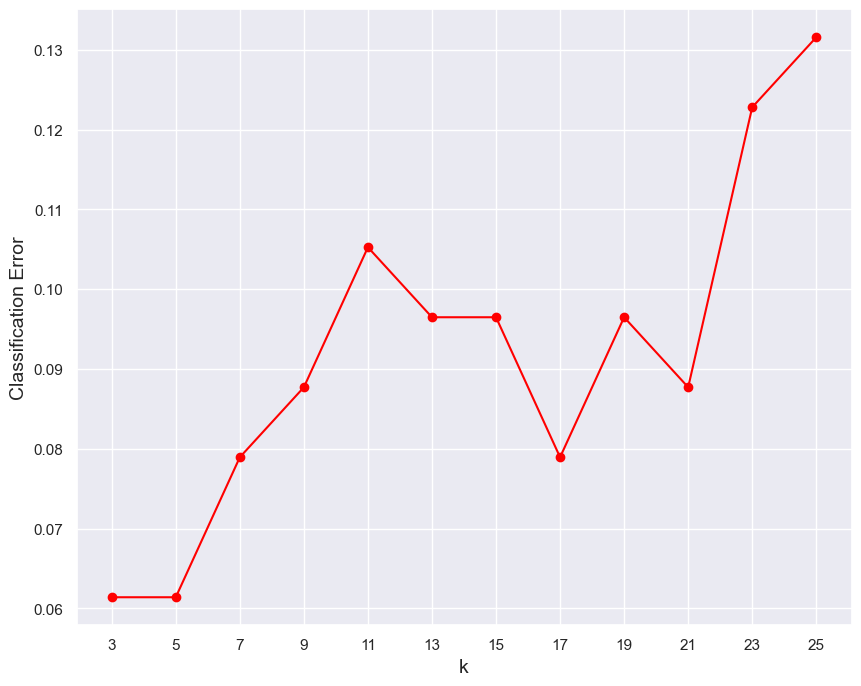

In [23]:
plt.figure(figsize = (10, 8))
plt.plot(possible_k, errors, color = 'red', marker = "o")
plt.xlabel('k', fontsize = 14)
plt.ylabel('Classification Error', fontsize = 14)
plt.xticks(possible_k)
plt.show()

---

## 3. Recommender Systems with $k$-Nearest Neighbors

Most internet products we use today are powered by recommender systems. Youtube, Netflix, Amazon, Pinterest, and long list of other internet products all rely on recommender systems to filter millions of contents and make personalized recommendations to their users. Recommender systems are well-studied and proven to provide tremendous values to internet businesses and their consumers. In fact, I was shock at the news that Netflix awarded a $1 million prize to a developer team in 2009, for an algorithm that increased the accuracy of the company’s recommendation system by 10%.

---

In [85]:
cat = pd.DataFrame(pd.read_excel("Datasets/cat_personality.xlsx"))
cat

,Row.names,Horodateur,Sexe,Age,Race,Nombre,Logement,Zone,Ext,Obs,...,Brutal,Dominant,Agressif,Impulsif,Prévisible,Distrait,Abondance,PredOiseau,PredMamm,Plus
0,1,2021-02-09 16:36:39.042,F,Moinsde1,SBI,3,ASB,U,0,0,...,1,1,1,1,1,1,NSP,4,4,NaN
1,10,2021-02-12 18:25:58.373,F,Moinsde1,SBI,1,AAB,U,0,2,...,2,2,3,4,4,3,NSP,0,0,NaN
2,100,2021-03-06 22:04:33.192,F,2a10,EUR,4,ML,U,0,2,...,1,1,1,2,4,2,NSP,0,0,"Elle ne chasse pas car elle ne sort pas, si el..."
3,1000,2021-02-18 16:10:11.117,F,Moinsde1,EUR,1,ML,R,2,2,...,4,3,3,3,4,4,3,0,0,Elle vient quand je l'appelle
4,1001,2021-02-18 18:00:50.851,F,1a2,SBI,2,MI,R,1,2,...,2,4,1,4,3,3,3,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,995,2021-02-18 12:31:48.805,F,2a10,PER,1,MI,R,0,3,...,1,1,1,1,3,4,3,0,0,Mon chat PER est né aveugle mais le vie très bien
3139,996,2021-02-18 12:46:59.496,F,Moinsde1,MCO,3,MI,R,0,3,...,1,2,1,2,2,2,3,0,0,NaN
3140,997,2021-02-18 13:17:13.050,M,Plusde10,Autre,1,MI,PU,2,3,...,1,4,4,3,4,2,3,0,1,NaN
3141,998,2021-02-18 13:41:21.263,M,Moinsde1,BEN,1,ML,R,0,2,...,1,2,3,1,3,5,3,0,0,NaN


In [86]:
# Set the index attribute for our DataFrame 
cat.set_index("Race", drop = False, inplace = True)
cat

,Row.names,Horodateur,Sexe,Age,Race,Nombre,Logement,Zone,Ext,Obs,...,Brutal,Dominant,Agressif,Impulsif,Prévisible,Distrait,Abondance,PredOiseau,PredMamm,Plus
Race,,,,,,,,,,,,,,,,,,,,,
SBI,1,2021-02-09 16:36:39.042,F,Moinsde1,SBI,3,ASB,U,0,0,...,1,1,1,1,1,1,NSP,4,4,NaN
SBI,10,2021-02-12 18:25:58.373,F,Moinsde1,SBI,1,AAB,U,0,2,...,2,2,3,4,4,3,NSP,0,0,NaN
EUR,100,2021-03-06 22:04:33.192,F,2a10,EUR,4,ML,U,0,2,...,1,1,1,2,4,2,NSP,0,0,"Elle ne chasse pas car elle ne sort pas, si el..."
EUR,1000,2021-02-18 16:10:11.117,F,Moinsde1,EUR,1,ML,R,2,2,...,4,3,3,3,4,4,3,0,0,Elle vient quand je l'appelle
SBI,1001,2021-02-18 18:00:50.851,F,1a2,SBI,2,MI,R,1,2,...,2,4,1,4,3,3,3,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PER,995,2021-02-18 12:31:48.805,F,2a10,PER,1,MI,R,0,3,...,1,1,1,1,3,4,3,0,0,Mon chat PER est né aveugle mais le vie très bien
MCO,996,2021-02-18 12:46:59.496,F,Moinsde1,MCO,3,MI,R,0,3,...,1,2,1,2,2,2,3,0,0,NaN
Autre,997,2021-02-18 13:17:13.050,M,Plusde10,Autre,1,MI,PU,2,3,...,1,4,4,3,4,2,3,0,1,NaN


In [87]:
# Find the vector of data associated with "The Terminator"
cat.loc["SBI"]

,Row.names,Horodateur,Sexe,Age,Race,Nombre,Logement,Zone,Ext,Obs,...,Brutal,Dominant,Agressif,Impulsif,Prévisible,Distrait,Abondance,PredOiseau,PredMamm,Plus
Race,,,,,,,,,,,,,,,,,,,,,
SBI,1,2021-02-09 16:36:39.042,F,Moinsde1,SBI,3,ASB,U,0,0,...,1,1,1,1,1,1,NSP,4,4,NaN
SBI,10,2021-02-12 18:25:58.373,F,Moinsde1,SBI,1,AAB,U,0,2,...,2,2,3,4,4,3,NSP,0,0,NaN
SBI,1001,2021-02-18 18:00:50.851,F,1a2,SBI,2,MI,R,1,2,...,2,4,1,4,3,3,3,0,0,NaN
SBI,1002,2021-02-18 18:55:18.755,F,Plusde10,SBI,2,MI,R,1,3,...,1,1,1,1,4,1,3,0,0,NaN
SBI,1010,2021-02-18 23:05:07.682,M,2a10,SBI,2,ML,R,2,2,...,1,3,5,4,5,4,3,0,1,Pot de colle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SBI,968,2021-02-17 21:43:29.008,M,Moinsde1,SBI,1,ML,PU,2,3,...,1,4,3,3,4,3,3,0,0,Essai de chasser mais n’attrape rien sauf saut...
SBI,976,2021-02-18 02:09:54.479,F,1a2,SBI,1,MI,R,0,2,...,1,1,1,1,3,3,3,0,0,Mon chat n’est 0 sorti de la maison pour sa sé...
SBI,978,2021-02-18 05:59:17.000,M,2a10,SBI,3,MI,R,0,2,...,4,4,3,3,4,3,3,0,0,NaN


In [88]:
# View the columns of our DataFrame
cat.columns

Index(['Row.names', 'Horodateur', 'Sexe', 'Age', 'Race', 'Nombre', 'Logement',
       'Zone', 'Ext', 'Obs', 'Timide', 'Calme', 'Effrayé', 'Intelligent',
       'Vigilant', 'Perséverant', 'Affectueux', 'Amical', 'Solitaire',
       'Brutal', 'Dominant', 'Agressif', 'Impulsif', 'Prévisible', 'Distrait',
       'Abondance', 'PredOiseau', 'PredMamm', 'Plus'],
      dtype='object')

In [89]:
def cat_recommendations(cat_Race, df, k):
    categories = ['Timide', 
                    'Calme', 
                    'Effrayé', 
                    'Intelligent',
                    'Vigilant', 
                    'Perséverant', 
                    'Affectueux', 
                    'Amical',
                    'Solitaire',
                    'Brutal', 
                    'Dominant', 
                    'Agressif', 
                    'Impulsif', 
                    'Prévisible', 
                    'Distrait']

    X = df[categories].to_numpy()
    y = df["Race"].to_numpy()

    point = df[categories].loc[cat_Race].to_numpy()
    point1 = np.zeros(np.shape(point)[1])
    for i in range(0,np.shape(point)[1]):
        point1[i] = np.average(point[:,i])
    neighbors = k_nearest_neighbors(point1, X, y, k+1)
    return [x[1] for x in neighbors[1:]]

recommendations = cat_recommendations("SBI", cat, 5)

print("Cat Recommendations")
for i, cats in enumerate(recommendations):
    print(f"{i+1}. {cats}")

Cat Recommendations
1. BEN
2. NSP
3. RAG
4. MCO
5. SBI
